# Import necessory libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Data Collection

In [7]:
path = r"ad_click_dataset.csv"
df = pd.read_csv(path)
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [8]:
df.tail()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1
9999,3056,User3056,44.0,Male,Tablet,Top,Social Media,Morning,0


In [9]:
df.dtypes

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object

In [10]:
df.isna().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

# Data preprocessing - 1

In [11]:
# X and Y separation
x=df.drop(['id','full_name','click'],axis=1)
y= df['click']

In [12]:
x.nunique()

age                 47
gender               3
device_type          3
ad_position          3
browsing_history     5
time_of_day          4
dtype: int64

In [13]:

nan = x.isna().sum().index
for i in nan:
 print(x[i].unique())

[22. nan 41. 34. 39. 26. 40. 47. 19. 56. 24. 52. 42. 36. 43. 62. 45. 37.
 31. 58. 59. 48. 38. 49. 30. 46. 54. 44. 27. 57. 28. 51. 25. 61. 32. 64.
 23. 55. 21. 20. 35. 53. 33. 29. 63. 50. 18. 60.]
[nan 'Male' 'Non-Binary' 'Female']
['Desktop' nan 'Mobile' 'Tablet']
['Top' 'Side' nan 'Bottom']
['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']
['Afternoon' nan 'Night' 'Evening' 'Morning']


In [14]:
num = x.select_dtypes(include='number').columns

In [15]:
obj = x.select_dtypes(include='object').columns
for i in obj:
  x[i]=x[i].fillna(x[i].mode()[0])

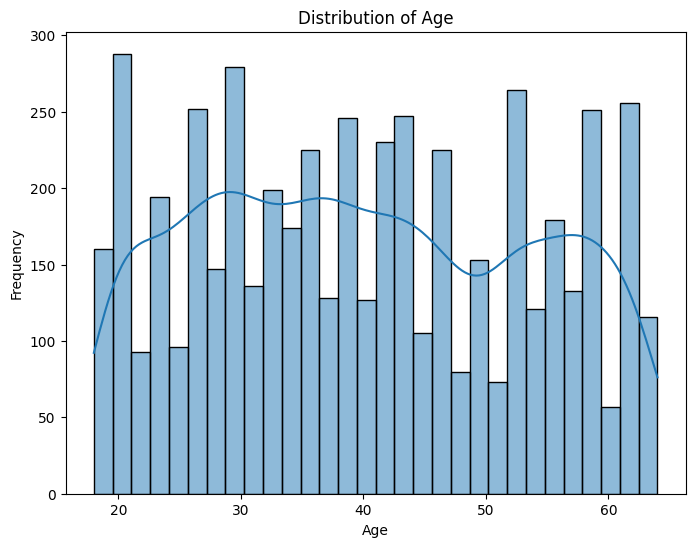

In [16]:
# Distribution of age before filling
plt.figure(figsize=(8,6))
sns.histplot(x['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
df['age'].mode()[0] , df['age'].median(),df['age'].mean()

(26.0, 39.5, 40.197363393198316)

In [18]:
x['age'] = x['age'].fillna(x['age'].median())

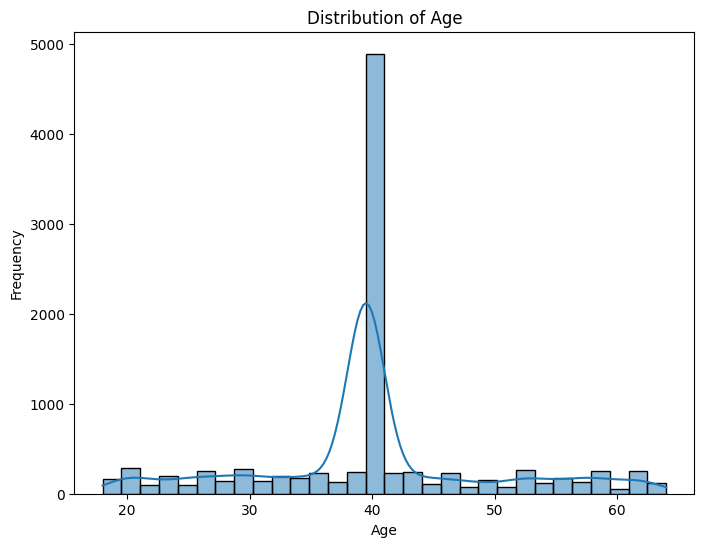

In [19]:
# Distribution of age after filling missing values
plt.figure(figsize=(8,6))
sns.histplot(x['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
x.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day
0,22.0,Female,Desktop,Top,Shopping,Afternoon
1,39.5,Male,Desktop,Top,Entertainment,Morning
2,41.0,Non-Binary,Desktop,Side,Education,Night
3,34.0,Male,Desktop,Bottom,Entertainment,Evening
4,39.0,Non-Binary,Desktop,Bottom,Social Media,Morning


In [21]:
x.isna().sum()

age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
dtype: int64

# Visualisation

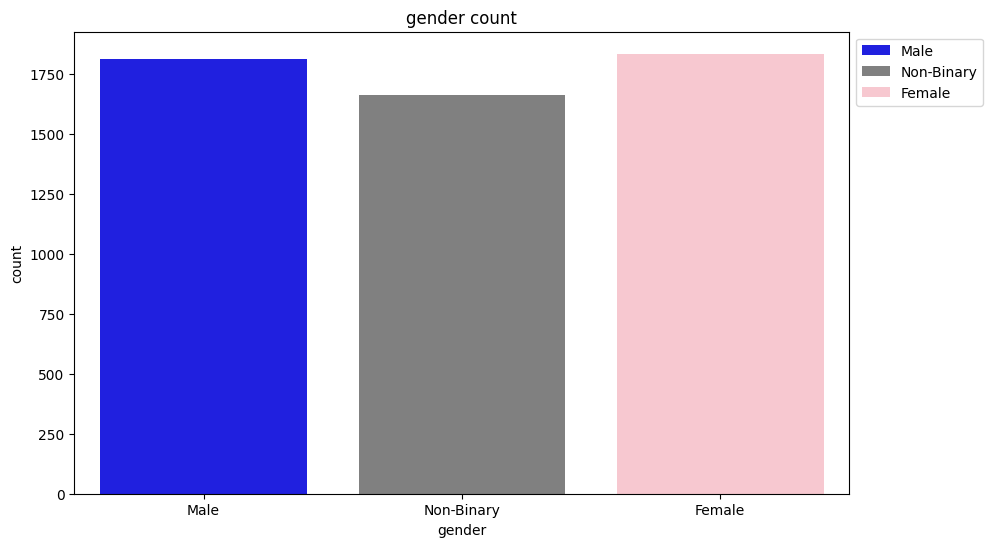

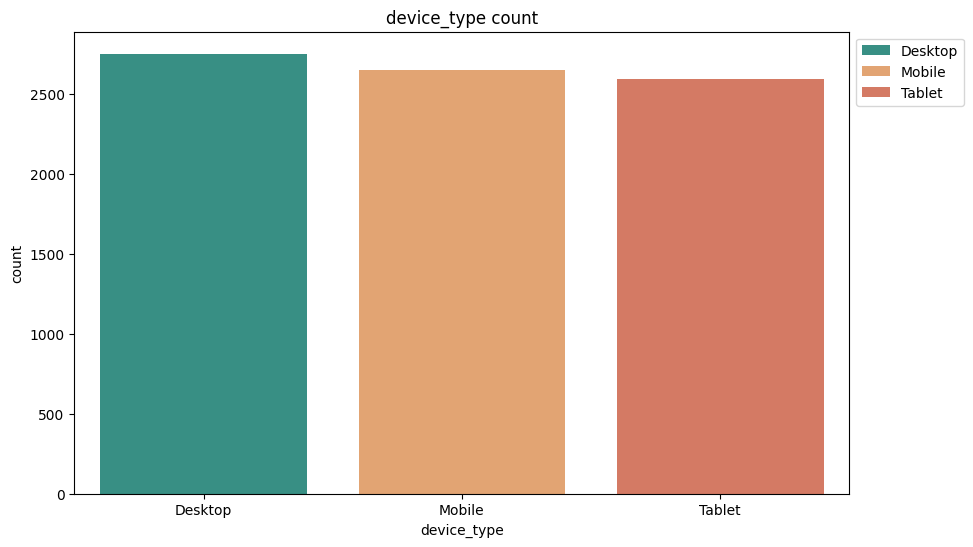

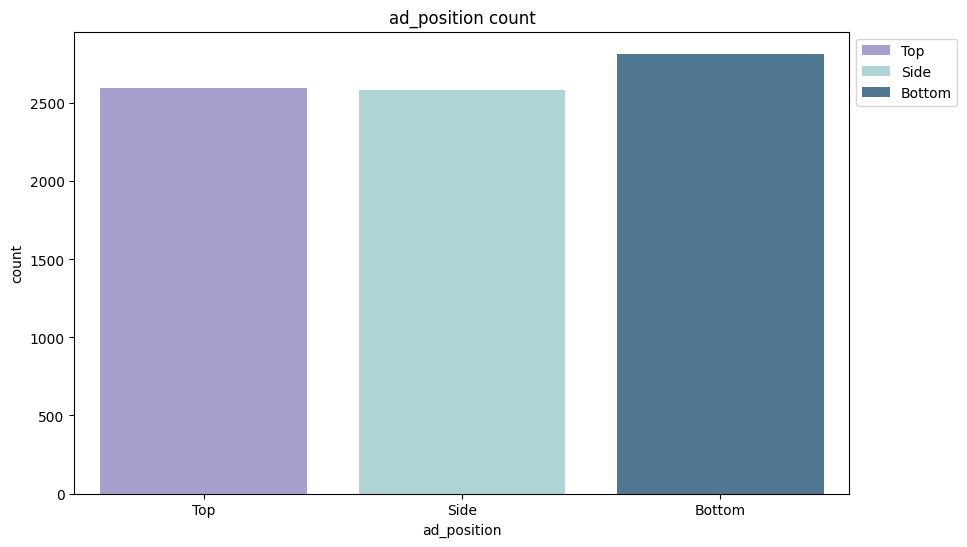

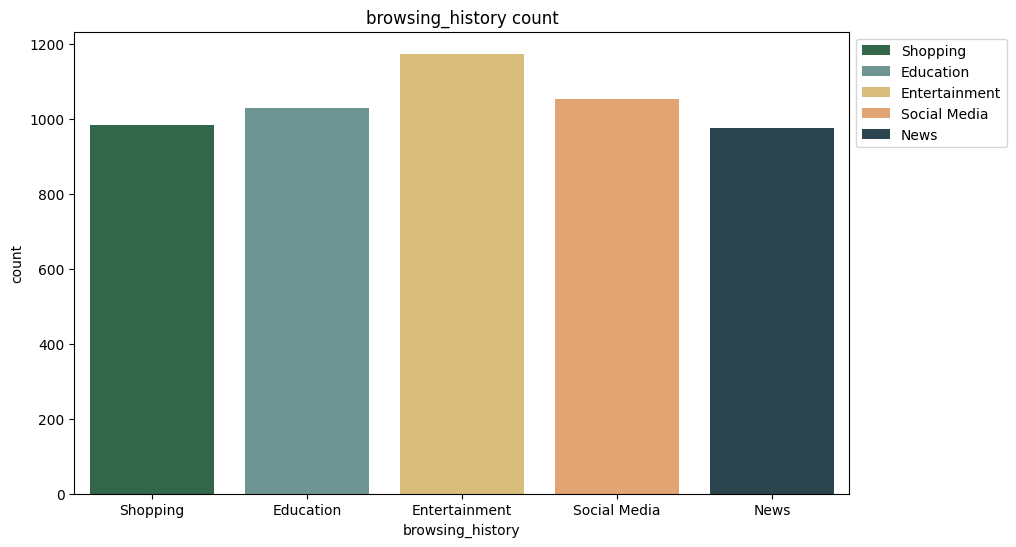

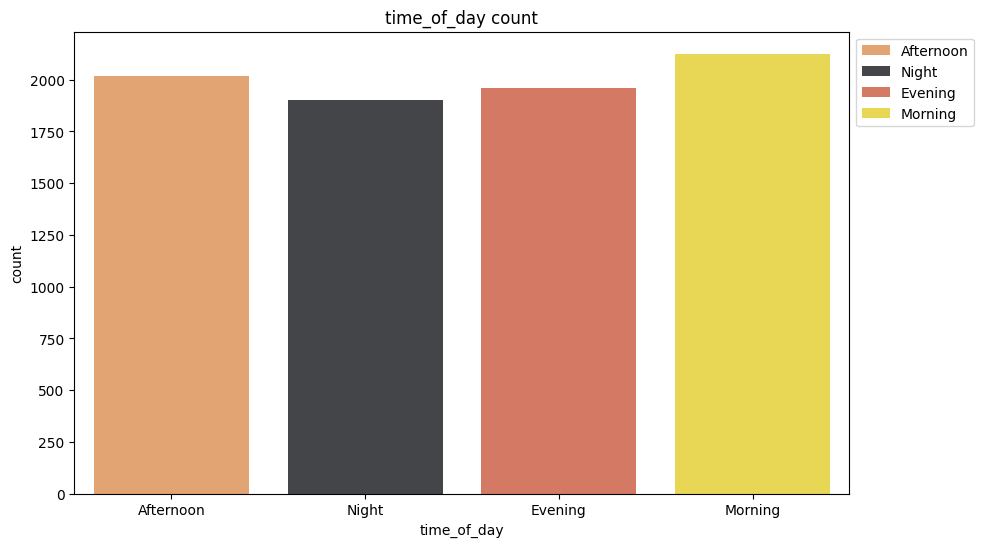

In [22]:

plts = [
    ['blue', 'gray', 'pink'],
    ['#2A9D8F', '#F4A261', '#E76F51'],
    ['#a098d6', '#A8DADC', '#457B9D'],
    ['#2C6E49', '#679c98', '#E9C46A', '#F4A261', '#264653'],
    ['#F4A261', '#42454a', '#E76F51', '#FFEB3B']
]
j=0
for i in obj:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=i,data = df,hue=i,palette=plts[j])
  j+=1
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.title(f'{i} count')

  plt.show()
  print("")

<Axes: xlabel='click', ylabel='count'>

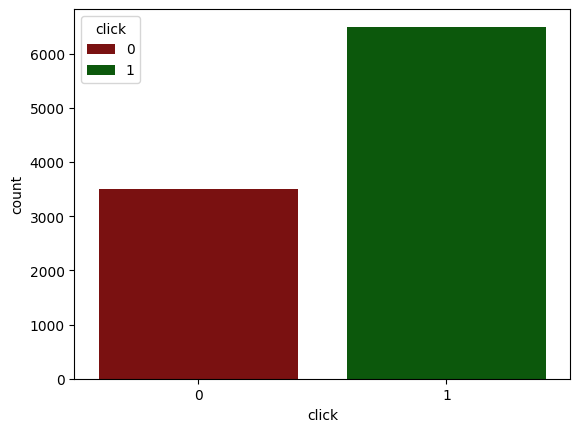

In [23]:
sns.countplot(x=df['click'],data=df,hue=df['click'],palette=['darkred','darkgreen'])

In [24]:
df['click'].value_counts()

click
1    6500
0    3500
Name: count, dtype: int64

# Visualisation and Preprocessing - II

### get_dummies encoding

In [25]:
dum_x = pd.get_dummies(x[obj],dtype=int,drop_first=True)
x = pd.concat([x,dum_x],axis=1)
x.drop(obj,axis=1,inplace=True)

In [26]:
x.head()

,age,gender_Male,gender_Non-Binary,device_type_Mobile,device_type_Tablet,ad_position_Side,ad_position_Top,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,39.5,1,0,0,0,0,1,1,0,0,0,0,1,0
2,41.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,34.0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,39.0,0,1,0,0,0,0,0,0,0,1,0,1,0


### Outlier_check

Column: age
Lower Bound: 35.0, Upper Bound: 43.0


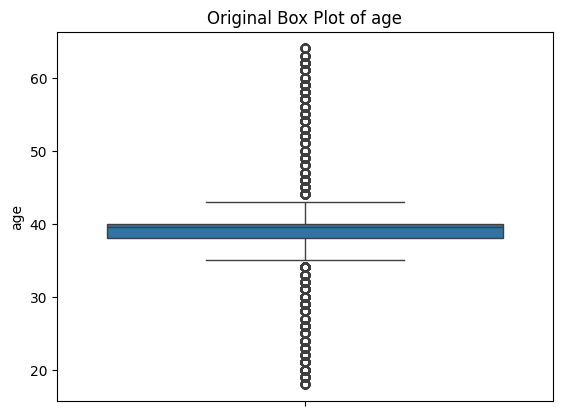

In [27]:
# outliers cleaning
def outliers_cleaning(clms):
  for column in clms:
    Q1 = np.percentile(x[column], 25)
    Q3 = np.percentile(x[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    sns.boxplot(y=x[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()



outliers_cleaning(num)

### Train Test Splitting

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Model creation And Evaluation

In [30]:
knn = KNeighborsClassifier()
nb = BernoulliNB()
svm = SVC()
tree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
models = [knn,nb,svm,tree,rfc]

Model is :  KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.55      0.35      0.43       705
           1       0.71      0.84      0.77      1295

    accuracy                           0.67      2000
   macro avg       0.63      0.60      0.60      2000
weighted avg       0.65      0.67      0.65      2000


 accuracy =  0.6715


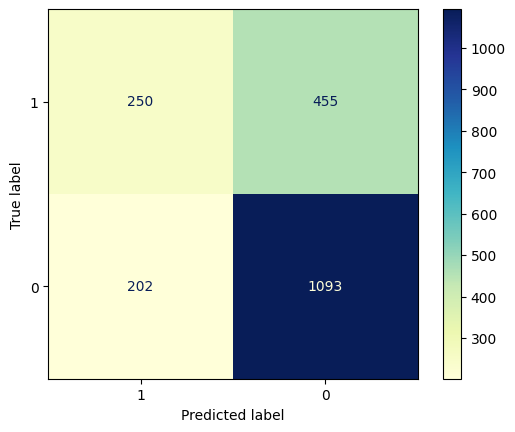

----------------------------------------------------------------------------------------------------
Model is :  BernoulliNB()

               precision    recall  f1-score   support

           0       0.42      0.01      0.03       705
           1       0.65      0.99      0.78      1295

    accuracy                           0.65      2000
   macro avg       0.53      0.50      0.41      2000
weighted avg       0.57      0.65      0.52      2000


 accuracy =  0.6455


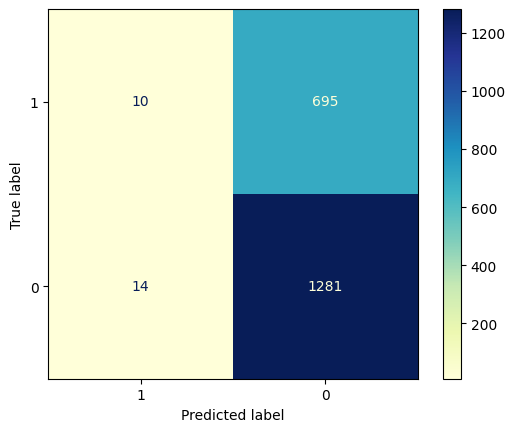

----------------------------------------------------------------------------------------------------
Model is :  SVC()

               precision    recall  f1-score   support

           0       0.61      0.12      0.20       705
           1       0.67      0.96      0.79      1295

    accuracy                           0.66      2000
   macro avg       0.64      0.54      0.49      2000
weighted avg       0.65      0.66      0.58      2000


 accuracy =  0.6625


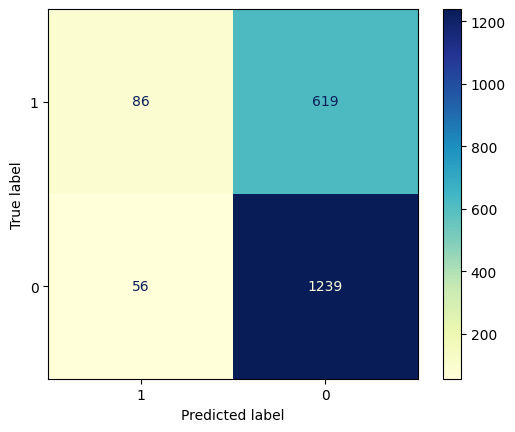

----------------------------------------------------------------------------------------------------
Model is :  DecisionTreeClassifier()

               precision    recall  f1-score   support

           0       0.67      0.47      0.55       705
           1       0.75      0.87      0.81      1295

    accuracy                           0.73      2000
   macro avg       0.71      0.67      0.68      2000
weighted avg       0.72      0.73      0.72      2000


 accuracy =  0.7295


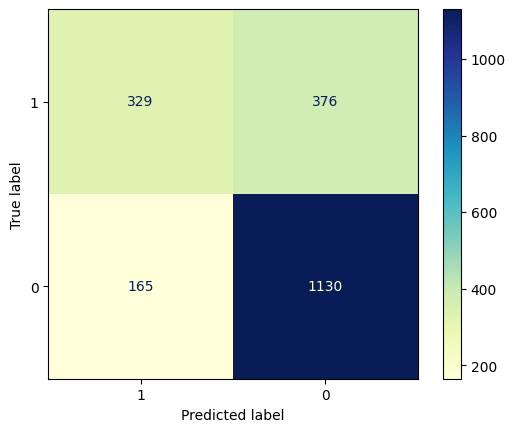

----------------------------------------------------------------------------------------------------
Model is :  RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.66      0.42      0.51       705
           1       0.74      0.88      0.80      1295

    accuracy                           0.72      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.71      0.72      0.70      2000


 accuracy =  0.72


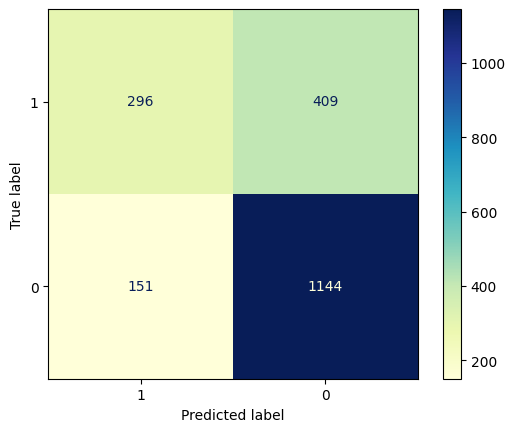

----------------------------------------------------------------------------------------------------


In [31]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print('Model is : ',model)
  print('\n',classification_report(y_test,y_pred))
  print('\n accuracy = ',accuracy_score(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred)
  cm
  label=[1,0]
  cmd=ConfusionMatrixDisplay(cm,display_labels=label)
  cmd.plot(cmap='YlGnBu')
  plt.show()
  print('-'*100)


# HyperParameter tuning:

In [32]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


```
 Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Best Accuracy: 0.72325
```

In [33]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.729

In [34]:
# Fitting 5 folds for each of 24 candidates, totalling 120 fits
# Best Parameters: {'bootstrap': True, 'max_features': None, 'n_estimators': 500}
# Best Cross-Validation Score: 0.7461249999999999

In [35]:
# model = RandomForestClassifier()

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [30, 20, None],
#     'max_features': [None, 'log2'],
#     'min_samples_split': [5, 10],
#     'n_estimators': [200, 350]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

In [36]:
# results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = results_df[['mean_test_score', 'std_test_score', 'params']]
# results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# # Display the top results
# results_df.head(2)

In [37]:
model = RandomForestClassifier(max_depth= 20, max_features= None, min_samples_split= 5, n_estimators= 350)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7525

# test sample


In [38]:
x_test[:3],y_test[:3]

(array([[ 0.43713476, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 , -1.21113652, -0.32564053,  3.02740553,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [-0.03690248, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 ,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [ 1.80657569, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595, -0.59082359,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682, -0.83167877, -0.48136961]]),
 6252    1
 4684    1
 1731    0
 Name: click, dtype: int64)

In [39]:
model.predict([[0.56521739, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ]])

array([1], dtype=int64)

In [40]:
x_test[:3],y_test[:3]

(array([[ 0.43713476, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 , -1.21113652, -0.32564053,  3.02740553,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [-0.03690248, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 ,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [ 1.80657569, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595, -0.59082359,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682, -0.83167877, -0.48136961]]),
 6252    1
 4684    1
 1731    0
 Name: click, dtype: int64)

# To Pickle

In [41]:
import pickle

# Save model
with open('ad_click.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [42]:
with open("feature_columns.pkl", "wb") as columns_file:
    pickle.dump(x.columns.tolist(), columns_file)


In [43]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
